In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("C:\\Users\\sghoz\\OneDrive\\Desktop\\Datasets\\youtubers_df.csv")
df = pd.DataFrame(data)
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [ ]:
#Getting the number of rows and columns for the dataframe
df.shape

(1000, 9)

In [ ]:
#Getting info about the dataframe as number of columns,rows,types of data in columns, number of null values and the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   int64  
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   int64  
 7   Comments    1000 non-null   int64  
 8   Links       1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [ ]:
#Getting extra info about the df 
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [ ]:
#Checking for any duplicates
df.duplicated().any()

False

In [ ]:
#Dropping rows containing null values
df.dropna(inplace=True)

In [ ]:
#Checking that there is no null values anymore after dropping them
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [ ]:
#Then checking the shape again after all of these droppings
df.shape

(694, 9)

# Number of rows has decreased as we've dropped the rows containing null, and the number of columns decreased by 1 due to the dropping of the rank column

In [ ]:
#Selecting a susbet of the dataset
numerical_cols = df[["Suscribers","Visits","Likes","Comments"]]
numerical_cols

,Suscribers,Visits,Likes,Comments
0,249500000,86200.0,2700,78
1,183500000,117400000.0,5300000,18500
2,165500000,7000000.0,24700,0
4,113500000,3900000.0,12400,0
5,111500000,2400000.0,197300,4900
...,...,...,...,...
989,11700000,359000.0,8800,342
990,11700000,1900000.0,98500,2900
991,11700000,477800.0,9900,556
997,11700000,211400.0,745,0


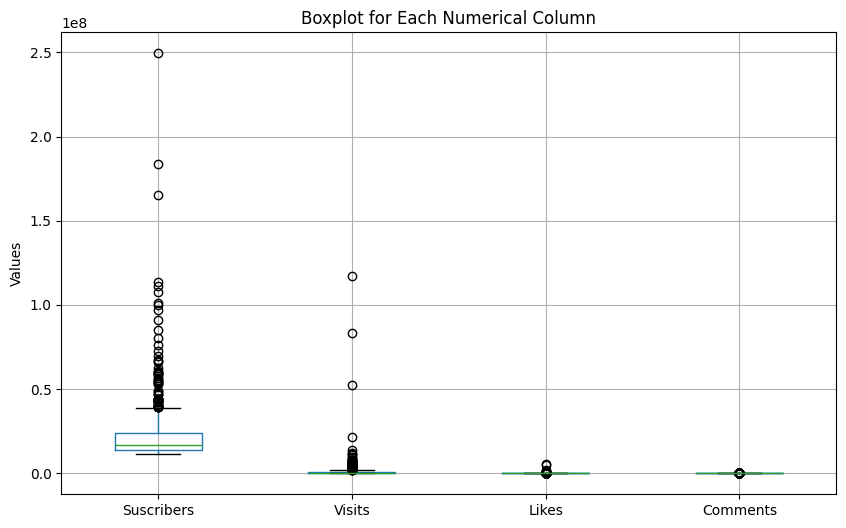

In [ ]:
#Plotting a boxplot to check for outliers
plt.figure(figsize=(10, 6))
numerical_cols.boxplot()
plt.title('Boxplot for Each Numerical Column')
plt.ylabel('Values')
plt.show()

# Here in the domain of our dataset, too large number of subscribers / visits / likes / comments doesn't necessarily mean outliers as some channels may have too large or too little number of each one of them


# We are going to drop the rows that have any of the 3 far away values of the Subscribers or any of the 4 far away values of the Visits as these may be an error that happened during the entry of the data


In [ ]:
df.drop(df[df["Suscribers"] >=  1.495000e+08].index,inplace=True)
df.drop(df[df["Visits"] >= 0.15000e+08].index,inplace=True)

In [ ]:
#Checking its shape after dropping the above mentioned points (rows)
df.shape

(688, 9)

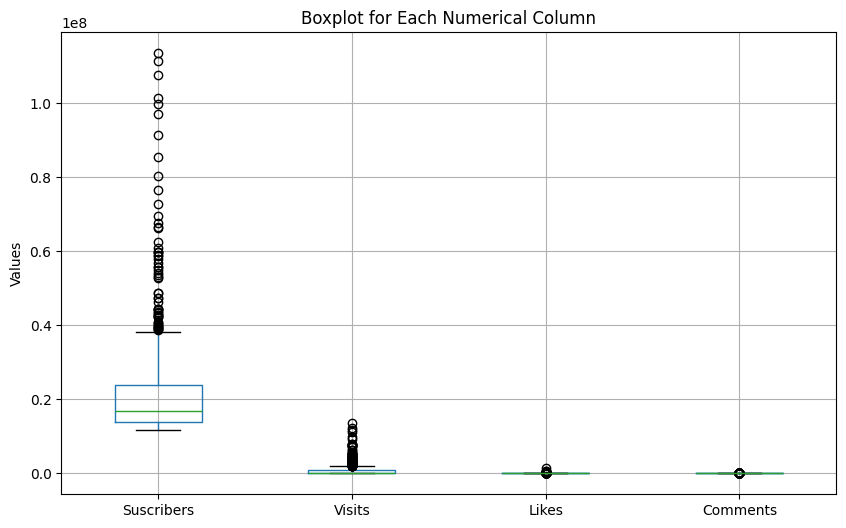

In [ ]:
#Re-plotting the bpxplots again after dropping the outliers
plt.figure(figsize=(10, 6))
df[["Suscribers","Visits","Likes","Comments"]].boxplot()
plt.title('Boxplot for Each Numerical Column')
plt.ylabel('Values')
plt.show()

In [ ]:
#Getting the mean of the 4 numerical columns
mean_dict = {}
for col in numerical_cols.columns:
    mean_dict[col] = (numerical_cols[col].mean()).round(2)
mean_dict  

{'Suscribers': 22415561.96,
 'Visits': 1210729.68,
 'Likes': 53473.6,
 'Comments': 1558.79}

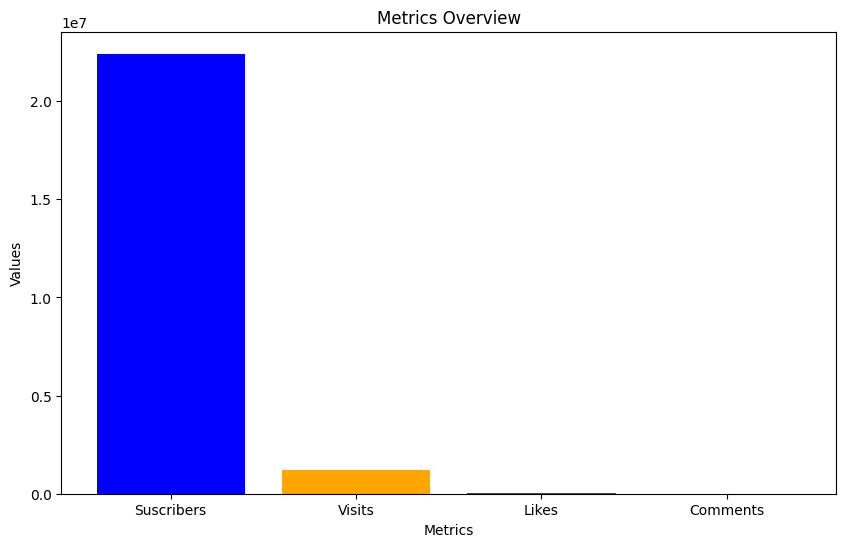

In [ ]:
# Create a bar plot for the mean of each of them
plt.figure(figsize=(10, 6))
plt.bar(mean_dict.keys(), mean_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Metrics Overview')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [41]:
# Calculate average performance metrics
avg_suscribers = df['Suscribers'].mean()
avg_visits = df['Visits'].mean()
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()

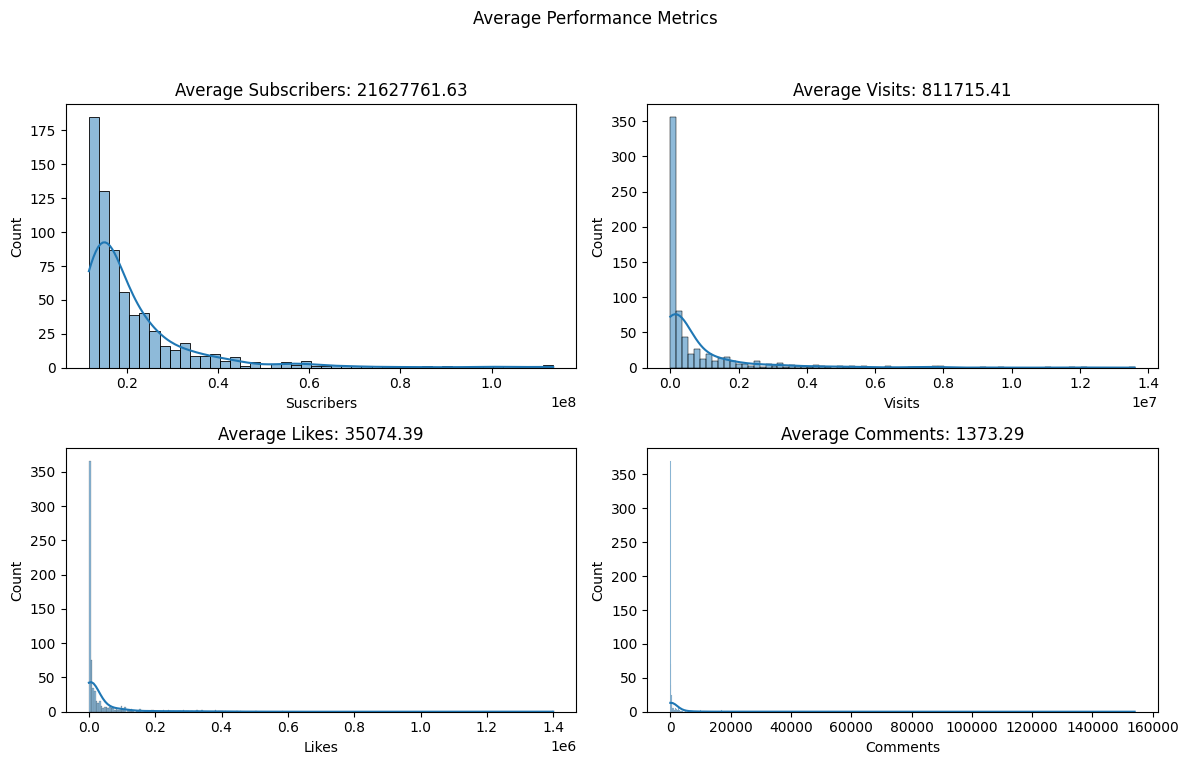

In [42]:
#Another way for plotting the mean of each one of them along with their distributions
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Average Performance Metrics')

# Plot average subscribers
sns.histplot(df['Suscribers'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Average Subscribers: {avg_suscribers:.2f}')

# Plot average visits
sns.histplot(df['Visits'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Average Visits: {avg_visits:.2f}')

# Plot average likes
sns.histplot(df['Likes'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Average Likes: {avg_likes:.2f}')

# Plot average comments
sns.histplot(df['Comments'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Average Comments: {avg_comments:.2f}')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

# Although the mean of the suscribers is too large, this doesn't necessarily mean that there're outliers, as in the domain of our dataset it's usuall that the number of suscribers is more than the number of comments and likes as not everyone who subscribes a channel , comments or likes or even visit the channel regularly

C:\Users\sghoz\AppData\Local\Temp\ipykernel_5944\3304516697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_count.index, y=category_count.values, palette='viridis')


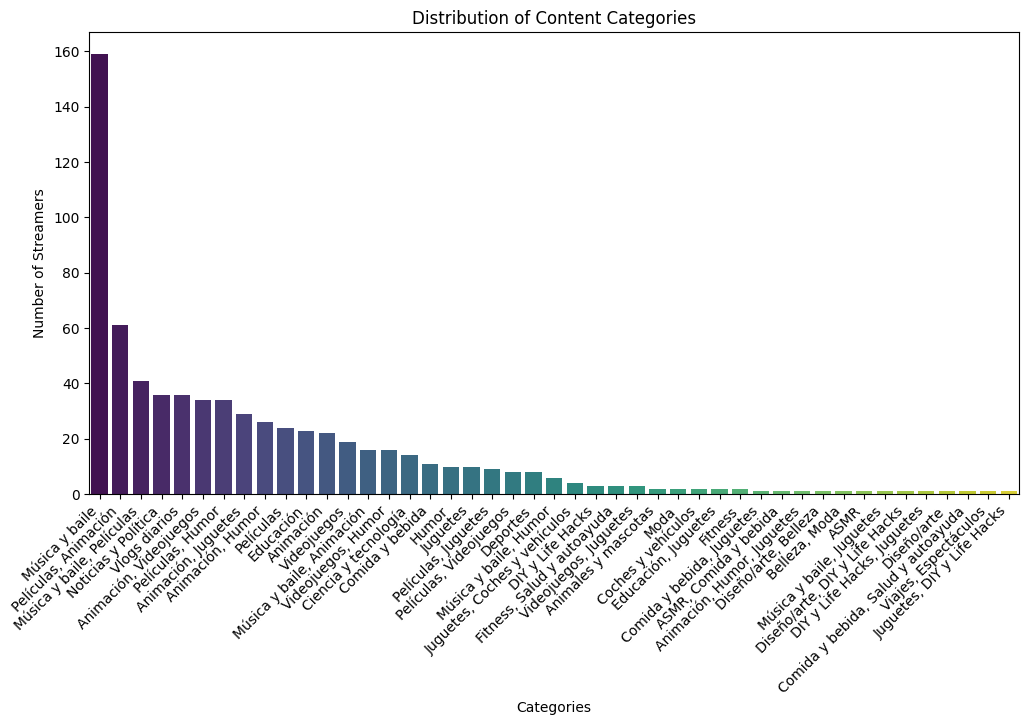

In [43]:
#Getting each category with their number of occurence 
category_count = df["Categories"].value_counts()

# Plot the distribution of content categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_count.index, y=category_count.values, palette='viridis')

#This is used to avoid the overlapping of the labels of the x-axis
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Content Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.show()

# Another way to get the most frequent category (The category with the largest number of streamers)

In [45]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)
df[categorical].describe()

Index(['Username', 'Categories', 'Country', 'Links'], dtype='object')


,Username,Categories,Country,Links
count,688,688,688,688
unique,683,45,27,683
top,NickyJamTV,Música y baile,Estados Unidos,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,2,159,222,2


# We get that the most frequent category (out of 45 categories) that occured is "Música y baile" 

# Also we get that the most frequent country is "Estados Unidos" which also can be shown using the following vizualization


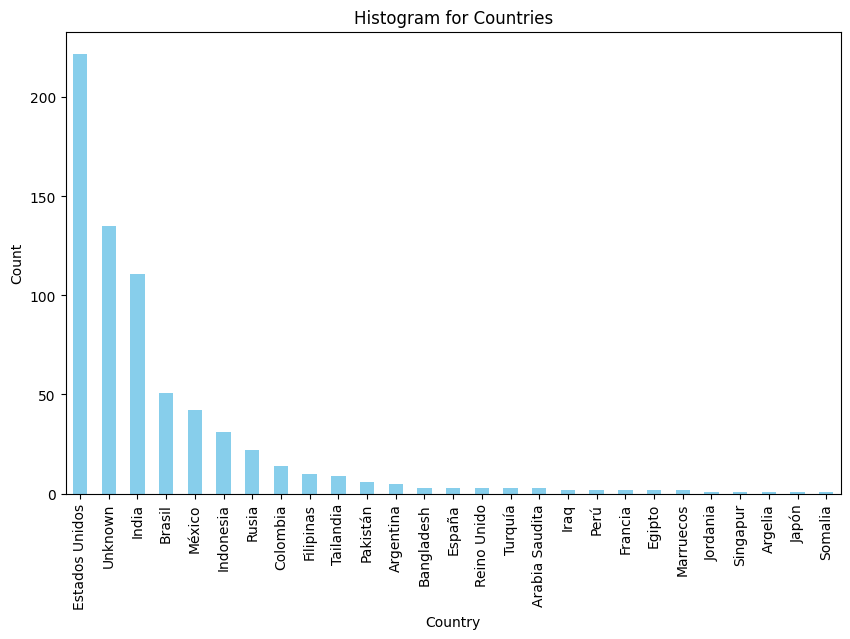

In [46]:
country_values =  df["Country"].value_counts()
plt.figure(figsize=(10, 6))
country_values.plot(kind='bar', color='skyblue')
plt.title('Histogram for Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# To get the correlation between the features:


In [47]:
corrs=numerical_cols.corr(method='pearson')
corrs

,Suscribers,Visits,Likes,Comments
Suscribers,1.000000,0.286039,0.248389,0.037293
Visits,0.286039,1.000000,0.966643,0.319666
Likes,0.248389,0.966643,1.000000,0.311424
Comments,0.037293,0.319666,0.311424,1.000000


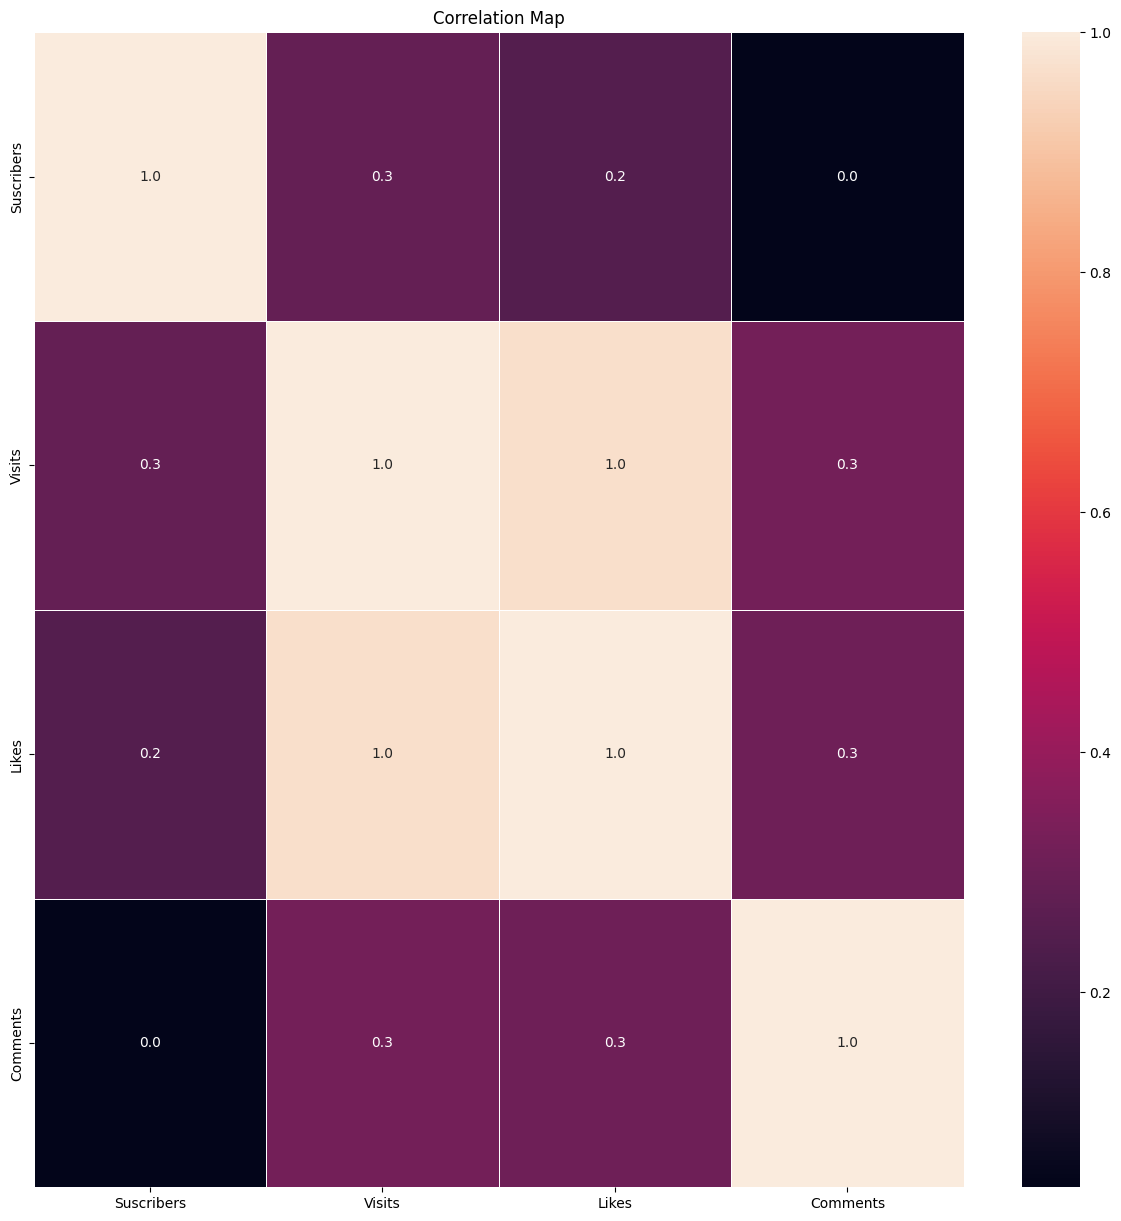

In [48]:
# Creating a correlation map to show the values of the correlated and uncorrelated columns
f,ax = plt.subplots(figsize=(15, 15)) # Controls the figure size
sns.heatmap(corrs, annot=True, linewidths=.5, fmt= '.1f',ax=ax) # Annot shows the value of the correlated index
plt.title("Correlation Map")
plt.show()

# We can see that the number of likes is positively strong correlated with the number of visits, which means that as the number of any one of them increases the number of the other increases and also the same thing happens in the case of the values decreasing. 


# Subscribers w.r.t likes and visits is weakly positive correlated, so their values are not really affected by each other.                      Comments and Subscribers are uncorrelated


In [49]:
#Selecting another subset of the dataframe
grouped_df = df[["Categories","Suscribers","Visits","Likes","Rank"]]
grouped_df

,Categories,Suscribers,Visits,Likes,Rank
4,"Animación, Juguetes",113500000,3900000.0,12400,5
5,"Películas, Videojuegos",111500000,2400000.0,197300,6
6,Juguetes,107500000,2600000.0,28000,7
7,"Animación, Juguetes",101400000,4100000.0,22100,8
8,Música y baile,99700000,74300.0,2600,9
...,...,...,...,...,...
989,Humor,11700000,359000.0,8800,990
990,Películas,11700000,1900000.0,98500,991
991,Educación,11700000,477800.0,9900,992
997,Música y baile,11700000,211400.0,745,998


In [50]:
# Grouping by "Categories" and aggregating with mean for "Suscribers", "Visits", and "Likes", and sum for "Rank"
result_df = grouped_df.groupby("Categories").agg({
    "Suscribers": "mean",
    "Visits": "mean",
    "Likes": "mean",
    "Rank": "sum"
})

# Renaming columns for clarity
result_df = result_df.rename(columns={
    "Suscribers": "Mean_Suscribers",
    "Visits": "Mean_Visits",
    "Likes": "Mean_Likes",
    "Rank": "Sum_Rank"
})

result_df = result_df.sort_values(by=['Mean_Suscribers', 'Mean_Visits', 'Mean_Likes','Sum_Rank'], ascending=False)

result_df

,Mean_Suscribers,Mean_Visits,Mean_Likes,Sum_Rank
Categories,,,,
Juguetes,3.788000e+07,7.005100e+05,5290.200000,3278
"Películas, Videojuegos",3.325000e+07,6.940375e+05,48083.375000,2707
"Animación, Juguetes",2.937586e+07,5.254483e+05,2653.068966,11724
"Diseño/arte, DIY y Life Hacks",2.570000e+07,2.600000e+06,127300.000000,208
Música y baile,2.543648e+07,3.762006e+05,17498.169811,68741
Videojuegos,2.498421e+07,1.387137e+06,57121.052632,8763
"Videojuegos, Juguetes",2.473333e+07,5.741667e+05,6400.000000,973
"Belleza, Moda",2.390000e+07,9.645000e+05,62300.000000,244
"Películas, Animación",2.269344e+07,5.513295e+05,25671.016393,30170


In [62]:
#This was also shown using the histogram above
max_rank = result_df.loc[result_df["Sum_Rank"].idxmax()].name
max_rank 

'Música y baile'

# We got that the category "Juguetes" has the most number of Suscribers and the category with the most number of streamers is 'Música y baile'


# To get the most frequent category in each country:

In [51]:
category_counts_per_country = df[["Categories","Country"]]
category_counts_per_country

,Categories,Country
4,"Animación, Juguetes",Unknown
5,"Películas, Videojuegos",Estados Unidos
6,Juguetes,Unknown
7,"Animación, Juguetes",Unknown
8,Música y baile,India
...,...,...
989,Humor,Estados Unidos
990,Películas,Somalia
991,Educación,Estados Unidos
997,Música y baile,Unknown


In [52]:
category_counts_per_country = category_counts_per_country.groupby(["Categories",'Country']).size().reset_index(name='Count')
category_counts_per_country = category_counts_per_country.sort_values(by = "Count" , ascending=False)
category_counts_per_country.head(10)

,Categories,Country,Count
70,Música y baile,Estados Unidos,53
72,Música y baile,India,41
17,"Animación, Juguetes",Unknown,28
21,"Animación, Videojuegos",Estados Unidos,19
107,Noticias y Política,India,19
81,Música y baile,Unknown,18
68,Música y baile,Brasil,17
11,"Animación, Humor",Estados Unidos,16
156,"Videojuegos, Humor",Estados Unidos,13
167,Vlogs diarios,India,13


# We got that the most freqeuent category in "Estados Unidos" and "India" is "Música y baile" 

# To get the average of the 4 performance metrics for each category , to know which category is more popular than the others:

In [53]:
#We first group by the Categories and then get the mean of the metric and sort its values descendingly
average_likes_by_category = df.groupby("Categories")["Likes"].mean().sort_values(ascending = False)
average_suscribers_by_category = df.groupby("Categories")["Suscribers"].mean().sort_values(ascending = False)
average_visits_by_category = df.groupby("Categories")["Visits"].mean().sort_values(ascending = False)
average_comments_by_category = df.groupby("Categories")["Comments"].mean().sort_values(ascending = False)

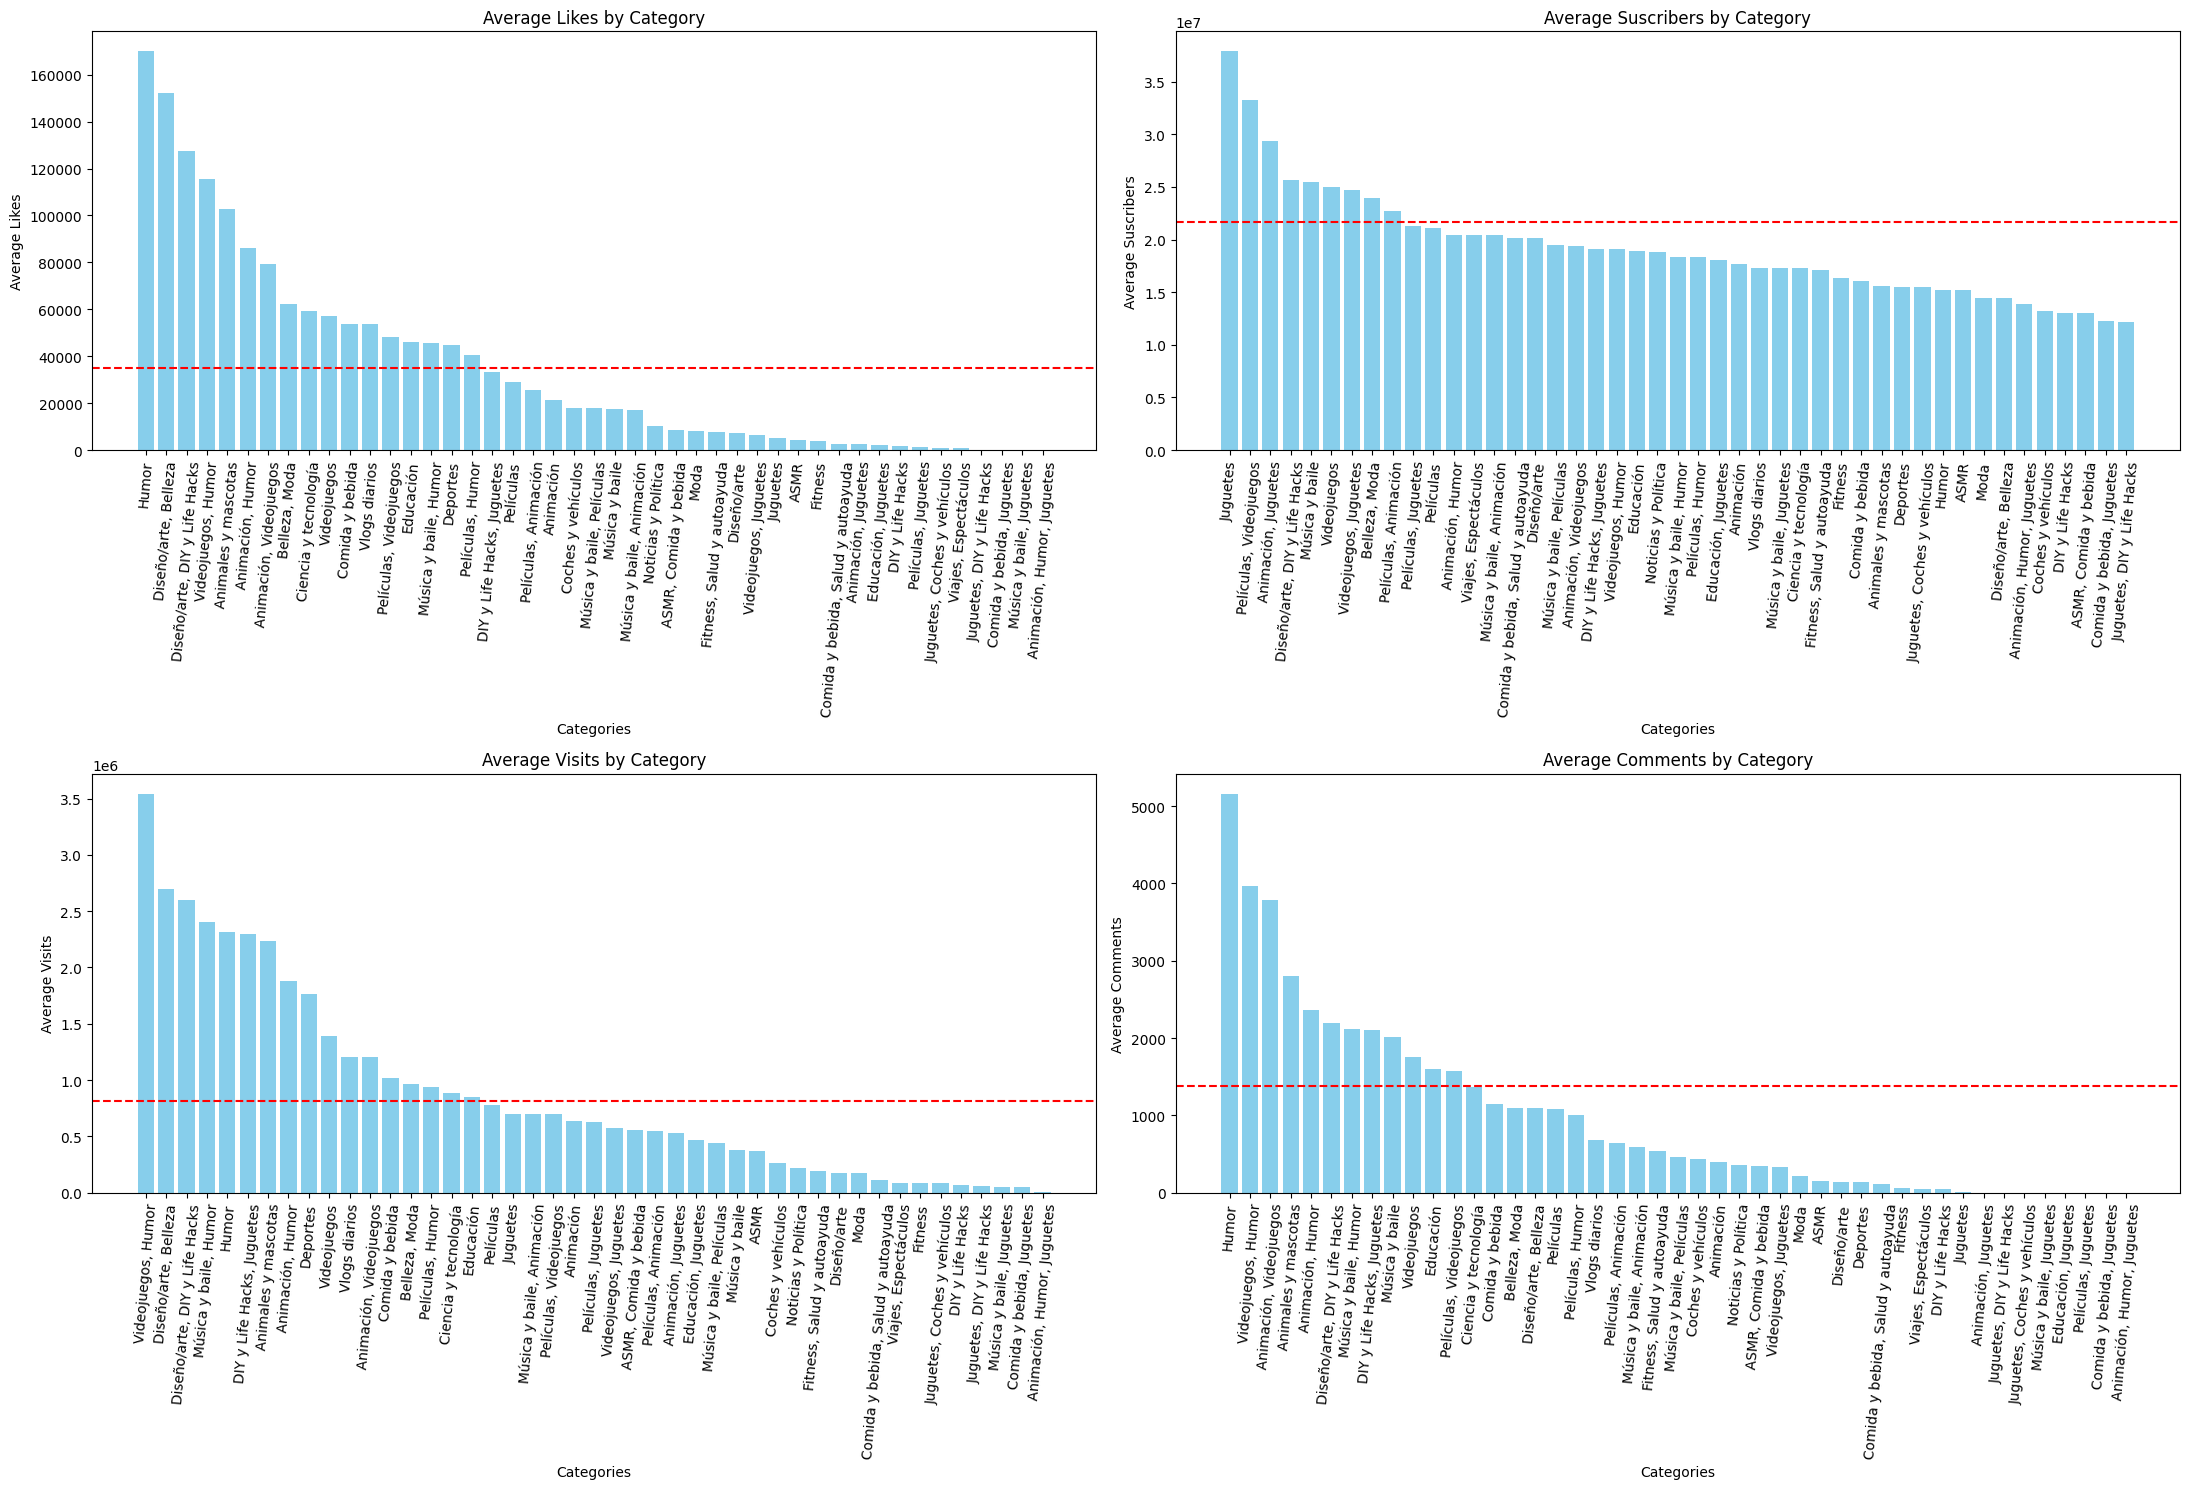

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(22, 15))

# Plot the average likes by category using bar plot
ax[0, 0].bar(average_likes_by_category.index, average_likes_by_category.values, color='skyblue')
ax[0, 0].tick_params(axis='x', rotation=85)
ax[0, 0].set_title('Average Likes by Category')
ax[0, 0].set_xlabel('Categories')
ax[0, 0].set_ylabel('Average Likes')
# Add a horizontal line at the mean of the metric
ax[0, 0].axhline(y=avg_likes, color='red', linestyle='--', label='Horizontal Line at mean')


# Plot the average suscribers by category using bar plot
ax[0, 1].bar(average_suscribers_by_category.index, average_suscribers_by_category.values, color='skyblue')
ax[0, 1].tick_params(axis='x', rotation=85)
ax[0, 1].set_title('Average Suscribers by Category')
ax[0, 1].set_xlabel('Categories')
ax[0, 1].set_ylabel('Average Suscribers')
# Add a horizontal line at the mean of the metric
ax[0, 1].axhline(y=avg_suscribers, color='red', linestyle='--', label='Horizontal Line at mean')


# Plot the average Visits by category using bar plot
ax[1, 0].bar(average_visits_by_category.index, average_visits_by_category.values, color='skyblue')
ax[1, 0].tick_params(axis='x', rotation=85)
ax[1, 0].set_title('Average Visits by Category')
ax[1, 0].set_xlabel('Categories')
ax[1, 0].set_ylabel('Average Visits')
# Add a horizontal line at the mean of the metric
ax[1, 0].axhline(y=avg_visits, color='red', linestyle='--', label='Horizontal Line at mean')


# Plot the average Comments by category using bar plot
ax[1, 1].bar(average_comments_by_category.index, average_comments_by_category.values, color='skyblue')
ax[1, 1].tick_params(axis='x', rotation=85)
ax[1, 1].set_title('Average Comments by Category')
ax[1, 1].set_xlabel('Categories')
ax[1, 1].set_ylabel('Average Comments')
# Add a horizontal line at the mean of the metric
ax[1, 1].axhline(y=avg_comments, color='red', linestyle='--', label='Horizontal Line at mean')

# Adjust layout
plt.tight_layout()
plt.show()


# We get that the Category with the most:          
#  1)Likes is: Humor
#  2)Suscribers is: Juguetes
#  3)Visits is: Videojuegos, Humor 
#  4)Comments is: Humor

# Also, we get that some categories as "Moda" have 4 low perfomance metrics. Thus, it would be recommended that if someone wants to launch a channel, then stay away of these categories to avoid low performance metrics

# We can also get the top performing categories that exceed the average of each metric (through checking the categories corresponding the bins that exceed the red horizontal line)

# To identify the top streamers (streamers that have suscribers , likes , comments and visits more than the average of each one of them) we do as follows:

In [56]:
# Identify streamers with above-average performance
above_avg_streamers = df[
    (df['Suscribers'] > avg_suscribers) &
    (df['Visits'] > avg_visits) &
    (df['Likes'] > avg_likes) &
    (df['Comments'] > avg_comments)
]

# Display top-performing content creators
top_performers = above_avg_streamers.sort_values(by=['Suscribers', 'Visits', 'Likes', 'Comments'], ascending=False)
top_performers

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
5,6,PewDiePie,"Películas, Videojuegos",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
10,11,BLACKPINK,Música y baile,91300000,Estados Unidos,863200.0,146900,3400,http://youtube.com/channel/UCOmHUn--16B90oW2L6...
14,15,BTS,Música y baile,76500000,India,969700.0,180300,7400,http://youtube.com/channel/UCLkAepWjdylmXSltof...
26,27,dudeperfect,Videojuegos,59700000,Estados Unidos,5300000.0,156500,4200,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,35,TaylorSwift,Música y baile,54100000,Estados Unidos,4300000.0,300400,15000,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
37,38,ArianaGrande,Música y baile,52900000,Estados Unidos,1100000.0,85800,3800,http://youtube.com/channel/UC9CoOnJkIBMdeijd9q...
39,40,JuegaGerman,"Películas, Animación",48600000,México,2000000.0,117100,3000,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...
43,44,A4a4a4a4,"Animación, Humor",47300000,Rusia,9700000.0,330400,22000,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...
58,59,Mikecrack,"Películas, Animación",43400000,México,2200000.0,183400,1800,http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...
62,63,KimberlyLoaiza,Música y baile,42100000,México,5300000.0,271300,16000,http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...


In [57]:
top_performers.shape

(34, 9)

# We have 34 top performing streamers out of 688 

In [58]:
# Calculate the count of categories for each country and create a DataFrame with columns 'Country', 'Categories', and 'Category_Count'
CategoryCount_Per_Country = top_performers.groupby(['Country', 'Categories']).size().reset_index(name = 'Category_Count')

# Sort the DataFrame based on 'Country' in ascending order and 'Category_Count' in descending order
CategoryCount_Per_Country = CategoryCount_Per_Country.sort_values(ascending = [True,False],by = ["Country","Category_Count"])

In [59]:
CategoryCount_Per_Country

,Country,Categories,Category_Count
0,Argentina,Animación,1
2,Estados Unidos,"Animación, Videojuegos",5
8,Estados Unidos,"Videojuegos, Humor",5
5,Estados Unidos,Música y baile,4
1,Estados Unidos,"Animación, Humor",1
3,Estados Unidos,"Diseño/arte, DIY y Life Hacks",1
4,Estados Unidos,Humor,1
6,Estados Unidos,"Películas, Videojuegos",1
7,Estados Unidos,Videojuegos,1
9,Estados Unidos,Vlogs diarios,1


# Here, we'll make a dataframe as a summary that shows if a new streamer is from Country X then it'd be better for him to choose a Category Y 

In [60]:
country = prev_country = ""
country_category={}

for i in range(CategoryCount_Per_Country.shape[0]):

    country = CategoryCount_Per_Country["Country"].iloc[i]
    max_category = CategoryCount_Per_Country["Categories"].iloc[i]
    max_count = CategoryCount_Per_Country[CategoryCount_Per_Country["Country"] == country].iloc[0]["Category_Count"]

    if not(prev_country):
        prev_country = country 
        country_category[country] = max_category
    else:
        prev_country = CategoryCount_Per_Country["Country"].iloc[i-1]
        
        if (prev_country != country):
            country_category[country] = max_category
            
        else:
            if country in country_category:
                if max_count == CategoryCount_Per_Country["Category_Count"].iloc[i]:
                    country_category[country] = country_category[country] + "," + max_category
                    
country_category = pd.DataFrame(list(country_category.items()), columns=['Country', 'Categories'])  
country_category['Categories'] = country_category['Categories'].str.split(',').apply(lambda x: ', '.join(pd.Series(x).str.strip().unique()))


In [61]:
country_category

,Country,Categories
0,Argentina,Animación
1,Estados Unidos,"Animación, Videojuegos, Humor"
2,India,Vlogs diarios
3,Indonesia,"Películas, Animación"
4,Iraq,"Animación, Videojuegos"
5,México,"Películas, Animación"
6,Rusia,"Animación, Humor"


# So we could recommend that if someone from Argentina wants to launch a youtube channel , it'd be better if it was of category "Animacion" to have good performance metrics, and so on